In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=None
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

# Reading Data

In [ ]:
df = pd.read_csv("train.csv")
df.head(10)
print(f"Data shape:{df.shape}")

Data shape:(1460, 81)


In [ ]:
y = df[['SalePrice']].values.reshape(-1, 1)
x = df.drop('SalePrice', axis = 1).values

# Numerical data

In [ ]:
# list of numerical variables
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

print("Number of Numerical Features is {}".format(len(numerical_features)))

# visualize the numerical variables
df[numerical_features].head()

Number of Numerical Features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Fill the missing value with Most frequent value

In [ ]:
simple_imp = SimpleImputer(strategy = 'most_frequent')
df_train_numerical = df[numerical_features]
imputed_df_numerical_train = pd.DataFrame(simple_imp.fit_transform(df_train_numerical))
imputed_df_numerical_train.columns = df_train_numerical.columns
imputed_df_numerical_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [ ]:
df[numerical_features].isna().sum().sort_values(ascending = False)/len(df[numerical_features])

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
Id               0.000000
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
EnclosedPorch    0.000000
HalfBath         0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
MSSubClass       0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float

LotFrontage, GarageYrBlt, MasVnrArea exist NA values. However, NA values in "GarageYrBlt" is meaningful. Hence, we only have to consider the impact of missing values on "LotFrontage".

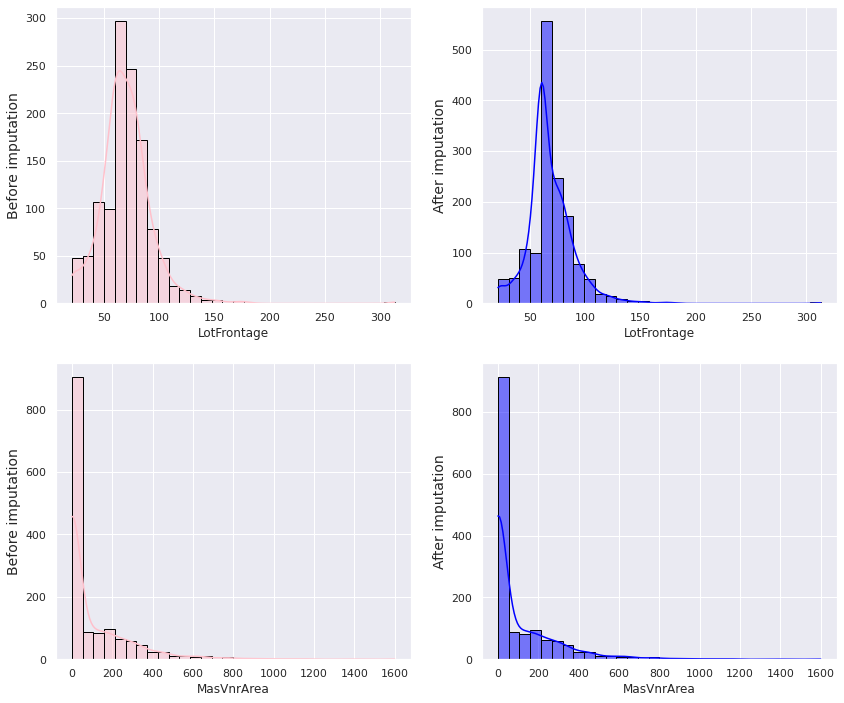

In [ ]:
# Check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df[feature],
                     kde=True, bins=30, color="pink", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=imputed_df_numerical_train[feature],
                     kde=True, bins=30, color="blue", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

Looking at the distribution plots, we see that the distributions for "LotFrontage" has been changed by imputation, while the distribution for "MasVnrArea" does not change. Hence, we decide to remove the feature from the datasets.

In [ ]:
numerical_features.remove("LotFrontage")
numerical_features.remove("GarageYrBlt")
df[numerical_features].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## Data classification

In [ ]:
 # list of variables that contain year information 
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'YrSold']

From 'Year' information, it's hard to explain its impact on saleprice, so we decide to convert these feature to some useful and explanatory features.  

In [ ]:
# Convert Year of construction to the Age of the house since the construction
imputed_df_numerical_train["AgeSinceConst"] = (2022 - imputed_df_numerical_train["YearBuilt"])

# Drop "YearBuilt"
imputed_df_numerical_train.drop(["YearBuilt"], axis=1, inplace=True)

In [ ]:
# Convert Year of remodeling to the Age of the house since the remodeling
imputed_df_numerical_train["AgeSinceRemod"] = (2022 - imputed_df_numerical_train["YearRemodAdd"])

# Drop "YearRemodAdd"
imputed_df_numerical_train.drop(["YearRemodAdd"], axis=1, inplace=True)


In [ ]:
year_feature.remove("YearBuilt")
year_feature.remove("YearRemodAdd")
numerical_features.remove("YearBuilt")
numerical_features.remove("YearRemodAdd")

year_feature.append("AgeSinceConst")
year_feature.append("AgeSinceRemod")           
numerical_features.append("AgeSinceConst")
numerical_features.append("AgeSinceRemod")    

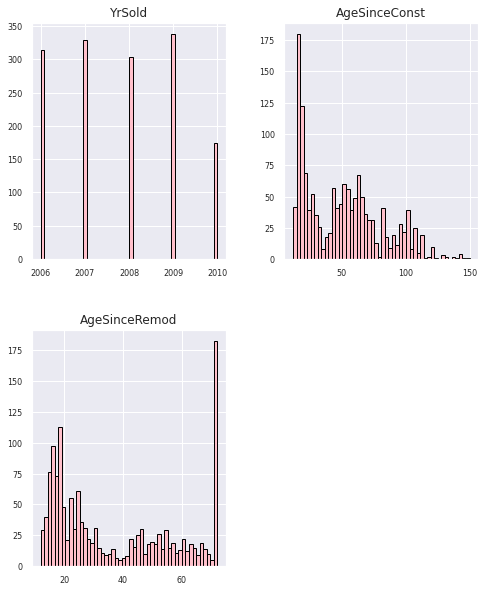

In [ ]:
yr_fig_ = imputed_df_numerical_train[year_feature].hist(figsize=(8,10), bins=50, color="pink", edgecolor="black", 
                                         xlabelsize=8, ylabelsize=8)

From the distribution listed above, we can see that house age in our dataset concentrates in  0~25 years.

In [ ]:
# list of numerical variables which is discrete variables
discrete_features = [feature for feature in numerical_features if len(imputed_df_numerical_train[feature].unique()) < 25 and feature not in year_feature+['Id']]
# manually adjustment
discrete_features.remove("LowQualFinSF")
discrete_features.remove("3SsnPorch")
discrete_features.remove("MiscVal")
discrete_features.remove("PoolArea")
discrete_features
print("Discrete Variables {}".format(len(discrete_features)))

Discrete Variables 13


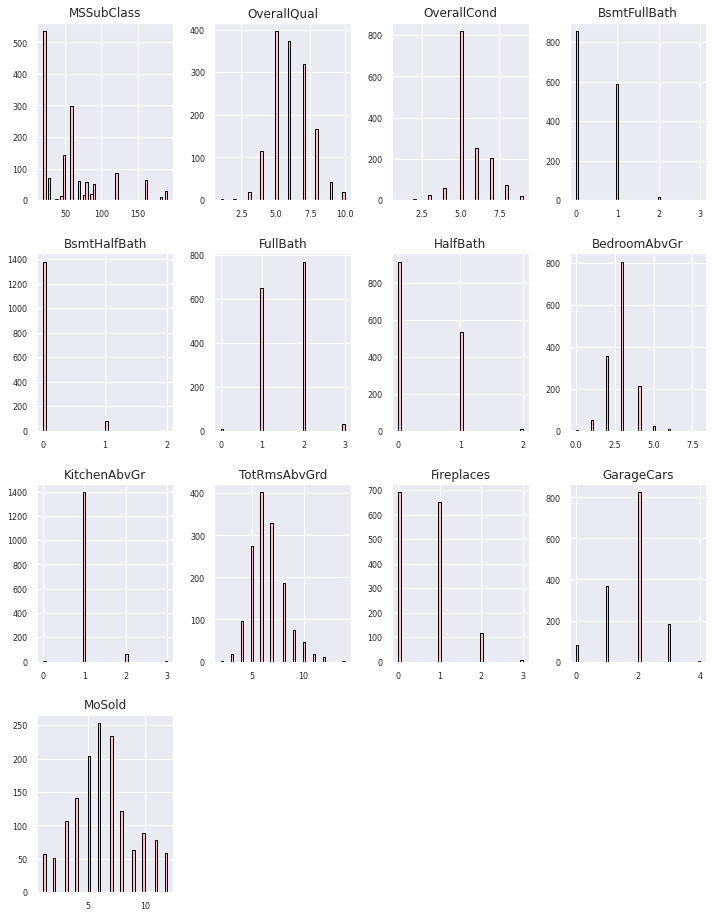

In [ ]:
fig_ = df[discrete_features].hist(figsize=(12,16), bins=50, color="pink",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1) # 0.1: drop column where 90% of the values are constant
# The fit finds the features with constant variance
sel.fit(df[discrete_features].iloc[:, :-1])
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df[discrete_features].iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df[discrete_features].iloc[:, :-1].columns if x not in df[discrete_features].iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

Number of retained features: 10

Number of quasi_constant features: 2

Quasi-constant features to be dropped: ['BsmtHalfBath', 'KitchenAbvGr']


In [ ]:
numerical_features.remove("KitchenAbvGr")
numerical_features.remove("BsmtHalfBath")

In [ ]:
# list of numerical variables which is continuous variables
continous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in year_feature + ['Id']]
continous_features
print("Continuous Features {}".format(len(continous_features)))

Continuous Features 19


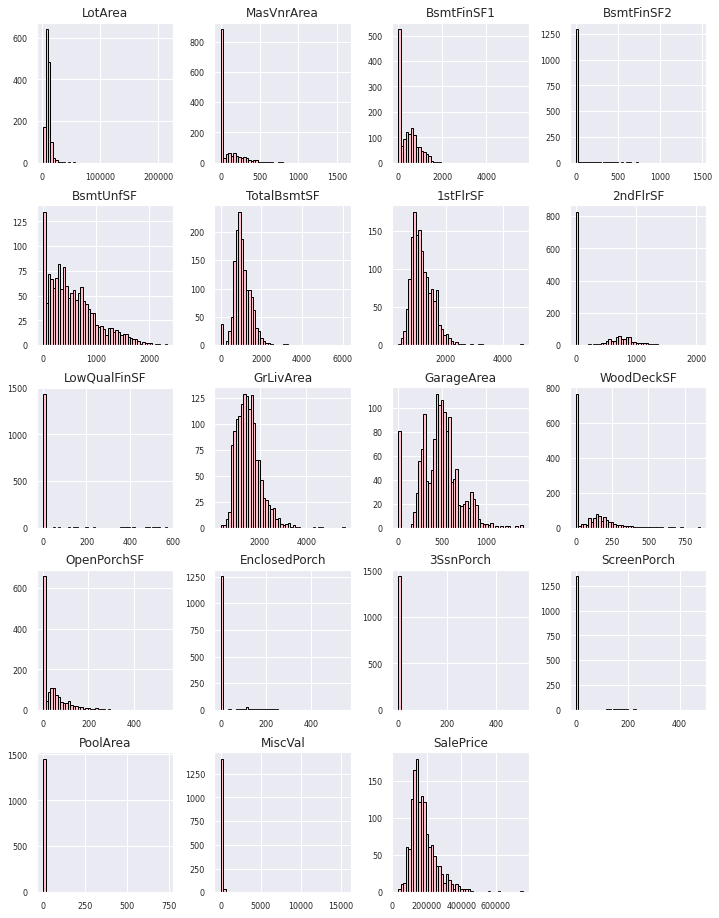

In [ ]:
fig_ = df[continous_features].hist(figsize=(12,16), bins=50, color="pink",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

In [ ]:
sel = VarianceThreshold(threshold=10000) 
# The fit finds the features with constant variance
sel.fit(df[continous_features].iloc[:, :-1])
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df[continous_features].iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df[continous_features].iloc[:, :-1].columns if x not in df[continous_features].iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

Number of retained features: 12

Number of quasi_constant features: 6

Quasi-constant features to be dropped: ['LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']


In [ ]:
drop_col = quasi_constant_features_list

df[continous_features].drop(drop_col,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Correlation Heatmap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


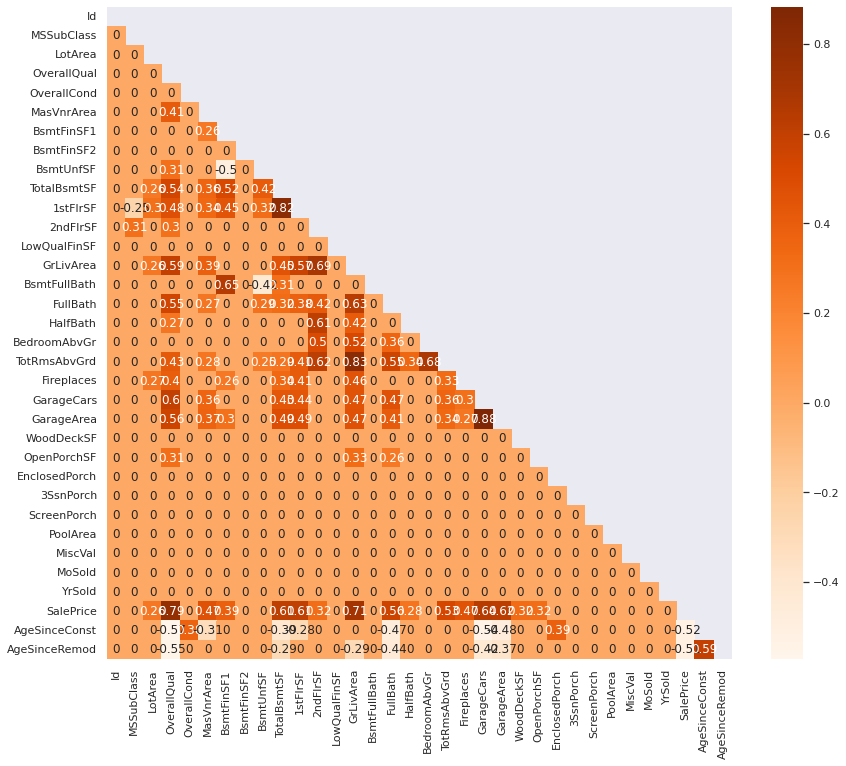

In [ ]:
corrMatrix = imputed_df_numerical_train[numerical_features].corr()
corrMatrix[(corrMatrix<0.25) & (corrMatrix > -0.25)] = 0
mask = np.zeros_like(corrMatrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrMatrix[mask] = np.nan
(corrMatrix.style.background_gradient(axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))
sns.heatmap(corrMatrix,annot=True,cmap="Oranges")
sns.set(rc={'figure.figsize':(20,18)})

### Select more important features

In [ ]:
data_num_corr = imputed_df_numerical_train[numerical_features].corr()["SalePrice"][:-1]
# Strongly correlated features ( p > 0.5 )
stronger_features = data_num_corr[abs(data_num_corr) >= 0.5].sort_values(ascending=False)
print(f"Strongly Correlated Values with SalePrice:\n{stronger_features}\n")
# Slightly correlated features (0.25 < p < 0.5 )
slighter_features = data_num_corr[(abs(data_num_corr) >= 0.25) & (abs(data_num_corr) < 0.5)].sort_values(ascending=False)
print(f"Slightly Correlated Values with SalePrice:\n{slighter_features}\n")

Strongly Correlated Values with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
AgeSinceConst   -0.522897
Name: SalePrice, dtype: float64

Slightly Correlated Values with SalePrice:
MasVnrArea     0.472614
Fireplaces     0.466929
BsmtFinSF1     0.386420
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
HalfBath       0.284108
LotArea        0.263843
Name: SalePrice, dtype: float64



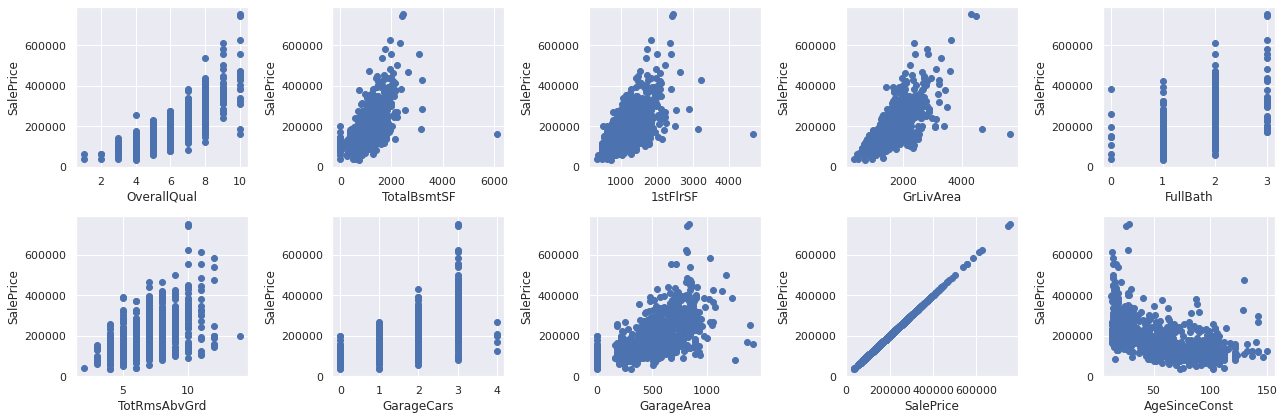

In [ ]:
strong_features = data_num_corr[abs(data_num_corr) >= 0.5].index.tolist()
fig,ax = plt.subplots(2,5,figsize=(18,6)) #adjust the whole plot size
for i in range(len(strong_features)):    
    feature = strong_features[i]
    m = int(i / 5)
    n = int(i % 5)
    ax[m,n].scatter(x = imputed_df_numerical_train[strong_features[i]], y = imputed_df_numerical_train['SalePrice'])
    ax[m,n].set_xlabel(feature)
    ax[m,n].set_ylabel('SalePrice')   
fig.tight_layout() 
plt.show()

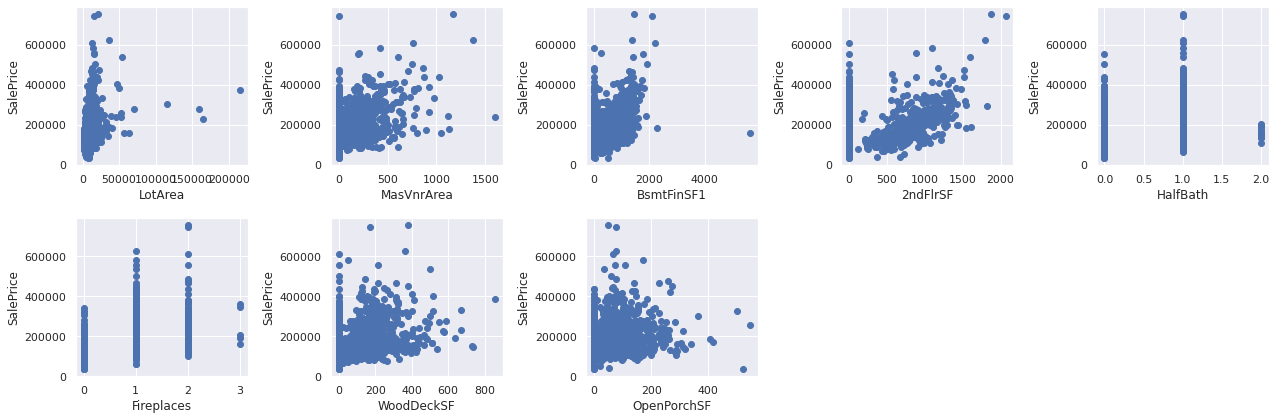

In [ ]:
slight_features = data_num_corr[(abs(data_num_corr) >= 0.25) & (abs(data_num_corr) < 0.5)].index.tolist()
fig,ax = plt.subplots(2,5,figsize=(18,6)) #adjust the whole plot size
for i in range(len(slight_features)):    
    feature = slight_features[i]
    m = int(i / 5)
    n = int(i % 5)
    ax[m,n].scatter(x = imputed_df_numerical_train[slight_features[i]], y = imputed_df_numerical_train['SalePrice'])
    ax[m,n].set_xlabel(feature)
    ax[m,n].set_ylabel('SalePrice')   
fig.tight_layout()
fig.delaxes(ax[1,3]) 
fig.delaxes(ax[1,4]) 
plt.show()

## List of numerical features

In [ ]:
numerical_features_=strong_features + slight_features
print(f"List of numerical features in the dataset:\n{numerical_features_}")
data_num = imputed_df_numerical_train[numerical_features].loc[:,numerical_features_]


List of numerical features in the dataset:
['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'AgeSinceConst', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF']


From the correlation heatmap, we can see that there exists highly correlation between 'GarageCar' and 'GarageArea'. Hence, we can drop one of them from the dataset.

In [ ]:
data_num.drop(['GarageCars'], axis = 1)
print(f'Kept Numerical data shape:{data_num.shape}')
data_num.head()

Kept Numerical data shape:(1460, 18)


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,AgeSinceConst,LotArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF
0,7.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,208500.0,19.0,8450.0,196.0,706.0,854.0,1.0,0.0,0.0,61.0
1,6.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,181500.0,46.0,9600.0,0.0,978.0,0.0,0.0,1.0,298.0,0.0
2,7.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,223500.0,21.0,11250.0,162.0,486.0,866.0,1.0,1.0,0.0,42.0
3,7.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,140000.0,107.0,9550.0,0.0,216.0,756.0,0.0,1.0,0.0,35.0
4,8.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,250000.0,22.0,14260.0,350.0,655.0,1053.0,1.0,1.0,192.0,84.0


# Categorical feature

In [ ]:
# list of categorical variables
categorical_features = [features for features in df.columns if df[features].dtypes == 'object']
print("Number of Categorical Features is {}".format(len(categorical_features)))
# visualize the numerical variables
df[categorical_features].head()

Number of Categorical Features is 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


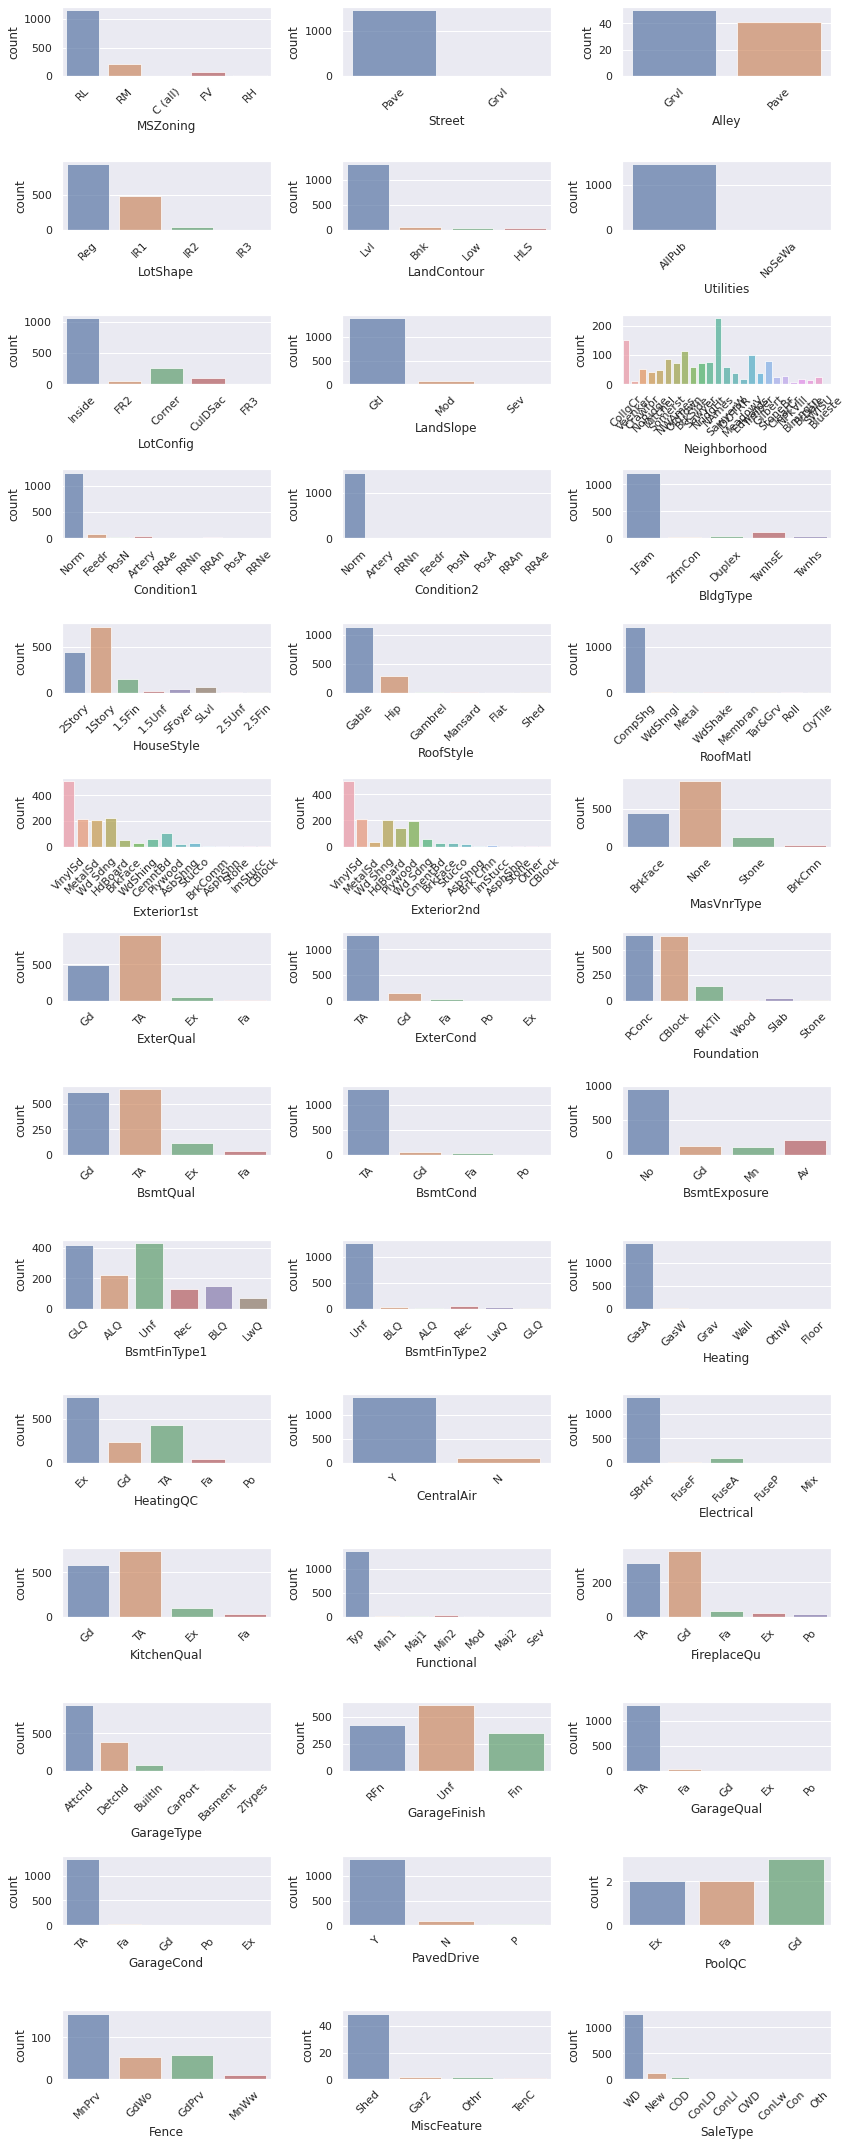

In [ ]:
df_categ = df[categorical_features]

fig, axes = plt.subplots(
    round(len(df_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax)

fig.tight_layout()

From the plots listed above, we can see that there exists dominant class in some feature. Hence, these features aren't able to impact the saleprice significantly.

In [ ]:
cat_feat_t = np.transpose(categorical_features)
values = np.transpose(df[categorical_features].values)
dict_1 = {re:g for re,g in zip(cat_feat_t,values)}


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dict_1)
for i in range(len(categorical_features)):
    data_le[categorical_features[i]] = labelencoder.fit_transform(data_le[categorical_features[i]])


In [ ]:
sel = VarianceThreshold(threshold=0.5) # 0.1: drop column where 90% of the values are constant
# The fit finds the features with constant variance
sel.fit(data_le.iloc[:, :-1])
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_categorical features: {len(data_le.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_categorical_features_list = [x for x in data_le.iloc[:, :-1].columns if x not in data_le.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-categorical features to be dropped: {quasi_categorical_features_list}")

Number of retained features: 25

Number of quasi_categorical features: 17

Quasi-categorical features to be dropped: ['MSZoning', 'Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'MasVnrType', 'ExterQual', 'BsmtCond', 'Heating', 'CentralAir', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Drop some categorical features which are 'non-informative' features
#drop_col = ['Street','Utilities','Condition1','Condition2','RoofMatl','Heating','Functional','GarageCond','GarageQual','Electrical']
drop_col = quasi_categorical_features_list

df_categ.drop(drop_col,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# One hot encoding
df_categ = pd.get_dummies(df_categ)
df_categ.head(8)

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


# Data for Modeling

In [ ]:
modeling_data = pd.concat([data_num, df_categ],axis=1)
print(f"Data Set:{modeling_data.shape}")
modeling_data.head()

Data Set:(1460, 200)


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,AgeSinceConst,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,208500.0,19.0,...,0,0,0,1,0,0,0,0,1,0
1,6.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,181500.0,46.0,...,0,0,0,1,0,0,0,0,1,0
2,7.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,223500.0,21.0,...,0,0,0,1,0,0,0,0,1,0
3,7.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,140000.0,107.0,...,0,0,0,1,1,0,0,0,0,0
4,8.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,250000.0,22.0,...,0,0,0,1,0,0,0,0,1,0


# Splitting the data

In [ ]:
x=modeling_data.copy().drop(["SalePrice"],axis=1)
y=modeling_data.loc[:,"SalePrice"]
# normalization
scaler = StandardScaler()
x_nor = scaler.fit_transform(x)
y_nor = np.log1p(y)
print(f"x shape:{x.shape}")
print(f"y.shape:{y.shape}")

x shape:(1460, 199)
y.shape:(1460,)


# Model

In [ ]:
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Functions to calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Function to split data into different groups
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_nor, y_nor, test_size = 0.2, random_state = 7)
x_train0, x_test0, y_train0, y_test0 = train_test_split(x, y, test_size = 0.2, random_state = 7)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_nor, y_nor, test_size = 0.1, random_state = 7)
print(f"X_train:{x_train2.shape}\ny_train:{y_train2.shape}")
print(f"\nX_test:{x_test2.shape}\ny_test:{y_test2.shape}")

X_train:(1168, 199)
y_train:(1168,)

X_test:(292, 199)
y_test:(292,)


In [ ]:
# Define models
model_linr = LinearRegression()
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()

### Ridge Regression

Best Ridge Regressor: Ridge(alpha=0.0095, normalize=True)
Training R²: 0.9052229942218136
Training RMSE: 0.1221115375119001
------------------------------------------------------------
Testing R²: 0.8747542045176437
Testing RMSE: 0.14487084338320597



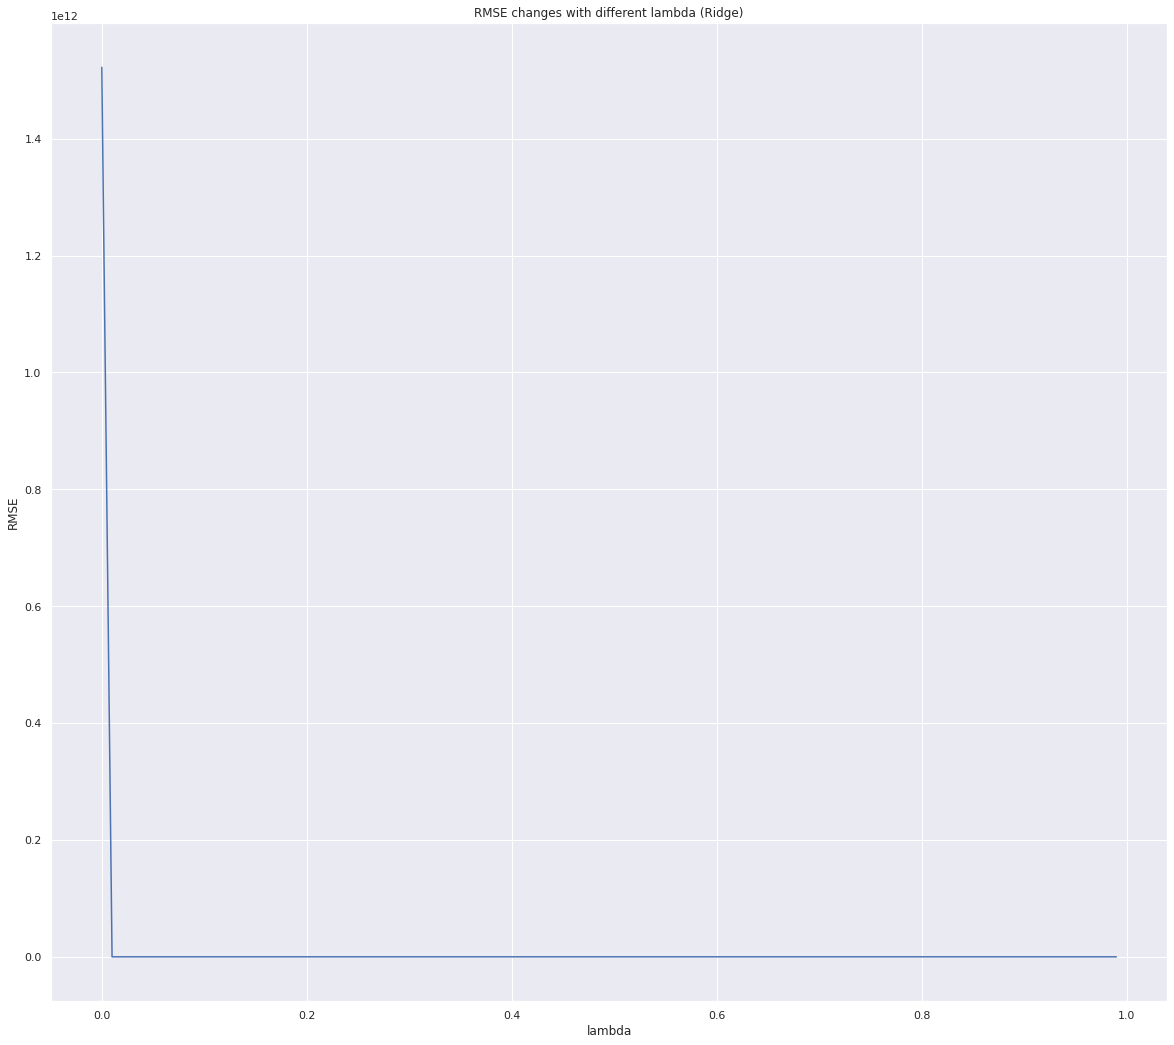

In [ ]:
mse = []
x_axis = []
r2 = []
for i in range(0,100):
    ridge = Ridge(alpha = i/10000,normalize = True)
    ridge.fit(x_train2, y_train2)
    mse.append(np.sqrt(mean_squared_error(y_test2, ridge.predict(x_test2)))) 
    x_axis.append(i/100)
    r2.append(ridge.score(x_test2,y_test2))
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("RMSE changes with different lambda (Ridge)")
plt.plot(x_axis,mse)
#plt.plot(x_axis,r2)
a = 100
for i in range(len(mse)):
  if mse[i] < a:
    if a - mse[i] > 0.0009:
       a = mse[i]
       b = i
  
ridge_best = Ridge(alpha = b/10000 ,normalize = True)
ridge_best.fit(x_train2, y_train2)
y_pred_ridge_best = ridge_best.predict(x_test2)
y_pred_ridge_best_tr = ridge_best.predict(x_train2)
print(f"Best Ridge Regressor: {ridge_best}")
print(f"Training R²: {r2_score(y_train2, y_pred_ridge_best_tr)}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train2, y_pred_ridge_best_tr))}")
print("------------------------------------------------------------")
print(f"Testing R²: {r2_score(y_test2, y_pred_ridge_best)}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test2, y_pred_ridge_best))}\n")


In [ ]:
ridge_best.intercept_

12.025534886465268

In [ ]:
ridge_best.n_features_in_

199

In [ ]:
ridge_best.coef_

array([ 7.87350046e-02, -1.62327805e-03,  3.42602703e-02,  5.58251847e-02,
        2.32598605e-02,  2.65751598e-02,  4.32747675e-02,  2.67951548e-03,
        1.09020737e-03,  4.33043861e-03, -6.06034592e-03, -2.54436984e-03,
        2.41010202e-02,  2.09902944e-02,  9.46078070e-03,  1.56797377e-02,
        5.53148746e-04, -1.27436832e-03,  1.10038764e-02, -8.72735448e-03,
       -4.96151964e-04, -1.18525911e-02,  4.05275008e-03,  1.50846427e-03,
        5.59107127e-03,  3.40232861e-03,  1.18212072e-02, -8.00605867e-03,
       -2.97568851e-03, -5.78483589e-03, -2.20271476e-03, -3.01938888e-03,
       -7.91146698e-03,  1.70488096e-03,  1.33002188e-02, -3.97555217e-03,
        2.91640816e-02, -1.79450868e-02, -4.11605508e-03, -2.49168285e-02,
       -1.81865013e-02, -8.24210410e-03, -1.87386157e-03, -5.03164013e-04,
       -3.96101157e-03,  1.73829648e-02,  2.45503690e-02, -2.14443385e-02,
        2.58063610e-03, -5.17046671e-03,  2.28603421e-03,  1.82369253e-02,
        2.29072708e-02, -

In [ ]:
modeling_data = pd.DataFrame(x)
ridge_dict_1 = {re:g for g,re in zip(modeling_data.columns,ridge_best.coef_)}
abs_ridge_coef = abs(ridge_best.coef_)
ridge_dict_2 = {re_2:g_2 for g_2,re_2 in zip(modeling_data.columns,abs_ridge_coef)}
print(ridge_dict_1)
print(ridge_dict_2)

{0.0787350046084469: 'OverallQual', -0.0016232780497791954: 'TotalBsmtSF', 0.0342602702785708: '1stFlrSF', 0.05582518470449297: 'GrLivArea', 0.023259860505785837: 'FullBath', 0.02657515979871466: 'TotRmsAbvGrd', 0.04327476746343183: 'GarageCars', 0.0026795154819635224: 'GarageArea', 0.0010902073662099445: 'AgeSinceConst', 0.004330438614897515: 'LotArea', -0.006060345916178041: 'MasVnrArea', -0.002544369842662726: 'BsmtFinSF1', 0.024101020173929497: '2ndFlrSF', 0.02099029444905375: 'HalfBath', 0.009460780698358214: 'Fireplaces', 0.01567973769410104: 'WoodDeckSF', 0.0005531487463728869: 'OpenPorchSF', -0.001274368316337221: 'LotShape_IR1', 0.011003876358098937: 'LotShape_IR2', -0.008727354479096474: 'LotShape_IR3', -0.0004961519642082843: 'LotShape_Reg', -0.011852591135456456: 'LandContour_Bnk', 0.004052750076190442: 'LandContour_HLS', 0.0015084642724905938: 'LandContour_Low', 0.005591071269518783: 'LandContour_Lvl', 0.003402328606183586: 'LotConfig_Corner', 0.011821207198784678: 'LotCon

In [ ]:
def selection_sort_max(p):
    for i in range(len(p)):
        swap = i + np.argmax(p[i:])
        (p[i], p[swap]) = (p[swap], p[i])
    return p

In [ ]:
def selection_sort_min(p):
    for i in range(len(p)):
        swap = i + np.argmin(p[i:])
        (p[i], p[swap]) = (p[swap], p[i])
    return p

In [ ]:
w_positive = selection_sort_max(ridge_best.coef_)
for i in range(10):
  print(ridge_dict_1[w_positive[i]])

OverallQual
GrLivArea
GarageCars
1stFlrSF
BsmtFinType1_GLQ
Neighborhood_Crawfor
TotRmsAbvGrd
BsmtExposure_Gd
BsmtQual_Ex
Neighborhood_NridgHt


In [ ]:
w_negative = selection_sort_min(ridge_best.coef_)
for i in range(10):
  print(ridge_dict_1[w_negative[i]])

Neighborhood_IDOTRR
Exterior1st_Wd Sdng
Neighborhood_OldTown
Foundation_BrkTil
Neighborhood_MeadowV
Neighborhood_Edwards
Functional_Maj2
BldgType_TwnhsE
HouseStyle_2Story
SaleCondition_Abnorml


In [ ]:
w_all = selection_sort_max(abs_ridge_coef)
for i in range(10):
  print(ridge_dict_2[w_all[i]])

OverallQual
GrLivArea
GarageCars
1stFlrSF
BsmtFinType1_GLQ
Neighborhood_Crawfor
TotRmsAbvGrd
BsmtExposure_Gd
BsmtQual_Ex
Neighborhood_IDOTRR


### Lasso Regression

Best Lasso Regressor: Lasso(alpha=0.00014, normalize=True)
Training R²: 0.8905083859059254
Training RMSE: 0.13124888916680405

------------------------------------------------------------
Testing R²: 0.8931100984831516
Testing RMSE: 0.13383439781330633



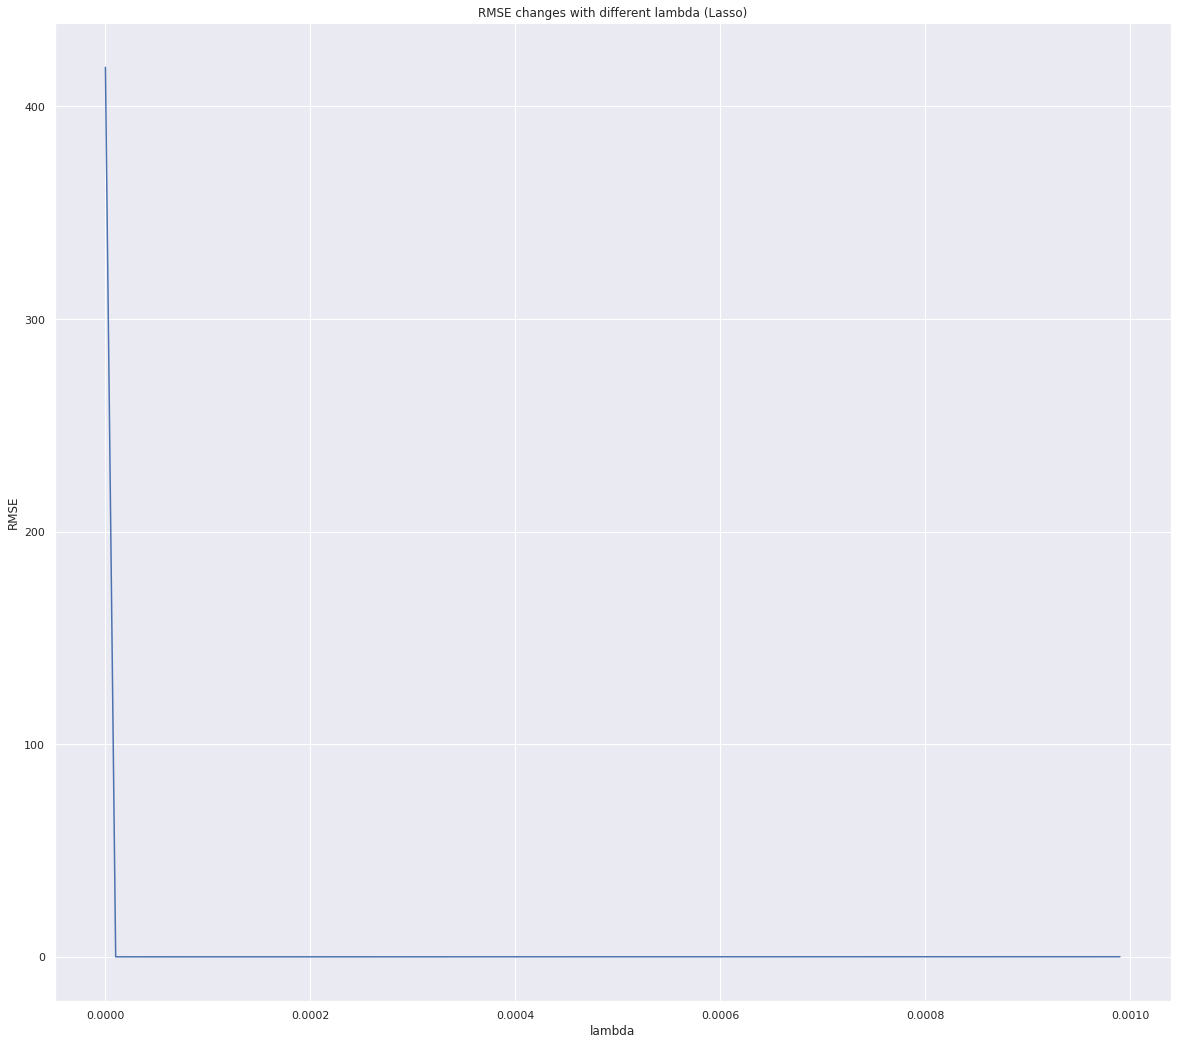

In [ ]:
mse = []
x_axis = []
r2 = []
for i in range(0,100):
    lasso = Lasso(alpha = i/100000,normalize = True)
    lasso.fit(x_train2, y_train2)
    mse.append(np.sqrt(mean_squared_error(y_test2, lasso.predict(x_test2)))) 
    x_axis.append(i/100000)
    r2.append(lasso.score(x_test2,y_test2))
plt.xlabel("lambda")
plt.ylabel("RMSE")
plt.title("RMSE changes with different lambda (Lasso)")
plt.plot(x_axis,mse)
a = 100
for i in range(len(mse)):
  if mse[i] < a:
    a = mse[i]
    b = i
lasso_best = Lasso(alpha = b/100000,normalize = True)
lasso_best.fit(x_train2, y_train2)
y_pred_lasso_best = lasso_best.predict(x_test2)
y_pred_lasso_best_tr = lasso_best.predict(x_train2)
print(f"Best Lasso Regressor: {lasso_best}")
print(f"Training R²: {r2_score(y_train2, y_pred_lasso_best_tr)}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train2, y_pred_lasso_best_tr))}")
print("------------------------------------------------------------")
print(f"Testing R²: {r2_score(y_test2, y_pred_lasso_best)}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test2, y_pred_lasso_best))}\n")
#plt.plot(x_axis,r2)

In [ ]:
lasso_best.intercept_

12.025024891707696

In [ ]:
lasso_best.coef_

array([ 1.02569325e-01,  1.41938851e-02,  1.03417629e-02,  7.52411000e-02,
        1.70562607e-02,  1.96358627e-02,  5.14636645e-02,  4.12485190e-03,
       -1.21092423e-02,  6.05485619e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.06039377e-02,  1.88683031e-02,  1.46756827e-02,
        0.00000000e+00,  0.00000000e+00,  6.39588606e-03, -5.87540863e-03,
       -1.99676705e-03, -9.86421915e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.96766642e-03, -0.00000000e+00,
       -0.00000000e+00, -7.69915722e-04, -0.00000000e+00, -0.00000000e+00,
       -8.32625309e-03,  0.00000000e+00,  8.74066475e-03, -0.00000000e+00,
        2.25976089e-02, -1.22977951e-02, -0.00000000e+00, -1.91753997e-02,
       -1.01835169e-02, -1.68627403e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.22883215e-02,  1.73165468e-02, -1.60219575e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.14013685e-02,
        1.66759929e-02,  

In [ ]:
modeling_data = pd.DataFrame(x)
lasso_dict_1 = {re:g for g,re in zip(modeling_data.columns,lasso_best.coef_)}
abs_lasso_coef = abs(lasso_best.coef_)
lasso_dict_2 = {re_2:g_2 for g_2,re_2 in zip(modeling_data.columns,abs_lasso_coef)}
print(lasso_dict_1)
print(lasso_dict_2)

{0.10256932472272454: 'OverallQual', 0.014193885134919414: 'TotalBsmtSF', 0.010341762866037713: '1stFlrSF', 0.07524110004779147: 'GrLivArea', 0.01705626068396726: 'FullBath', 0.019635862689726735: 'TotRmsAbvGrd', 0.05146366445118226: 'GarageCars', 0.004124851895520043: 'GarageArea', -0.012109242338611848: 'AgeSinceConst', 0.00605485619318041: 'LotArea', -0.0: 'SaleCondition_Partial', 0.01060393771089582: 'HalfBath', 0.01886830314324023: 'Fireplaces', 0.014675682731025031: 'WoodDeckSF', 0.006395886057169008: 'LotShape_IR2', -0.005875408629956674: 'LotShape_IR3', -0.001996767051543507: 'LotShape_Reg', -0.009864219153062558: 'LandContour_Bnk', 0.008967666418198957: 'LotConfig_CulDSac', -0.0007699157218387058: 'LotConfig_Inside', -0.008326253088922824: 'Neighborhood_BrDale', 0.008740664750243439: 'Neighborhood_ClearCr', 0.02259760892179947: 'Neighborhood_Crawfor', -0.01229779505741013: 'Neighborhood_Edwards', -0.019175399659084068: 'Neighborhood_IDOTRR', -0.010183516925948745: 'Neighborhoo

In [ ]:
w_positive = selection_sort_max(lasso_best.coef_)
for i in range(10):
  print(lasso_dict_1[w_positive[i]])

OverallQual
GrLivArea
GarageCars
BldgType_1Fam
Neighborhood_Crawfor
Condition1_Norm
HeatingQC_Ex
TotRmsAbvGrd
Fireplaces
Neighborhood_NridgHt


In [ ]:
w_negative = selection_sort_min(lasso_best.coef_)
for i in range(10):
  print(lasso_dict_1[w_negative[i]])

Neighborhood_IDOTRR
BsmtFinType1_Unf
SaleCondition_Abnorml
Neighborhood_OldTown
KitchenQual_TA
Foundation_BrkTil
Neighborhood_Edwards
AgeSinceConst
Foundation_Slab
Functional_Maj2


In [ ]:
w_all = selection_sort_max(abs_lasso_coef)
for i in range(10):
  print(lasso_dict_2[w_all[i]])

OverallQual
GrLivArea
GarageCars
BldgType_1Fam
Neighborhood_Crawfor
Condition1_Norm
HeatingQC_Ex
TotRmsAbvGrd
Neighborhood_IDOTRR
BsmtFinType1_Unf


.

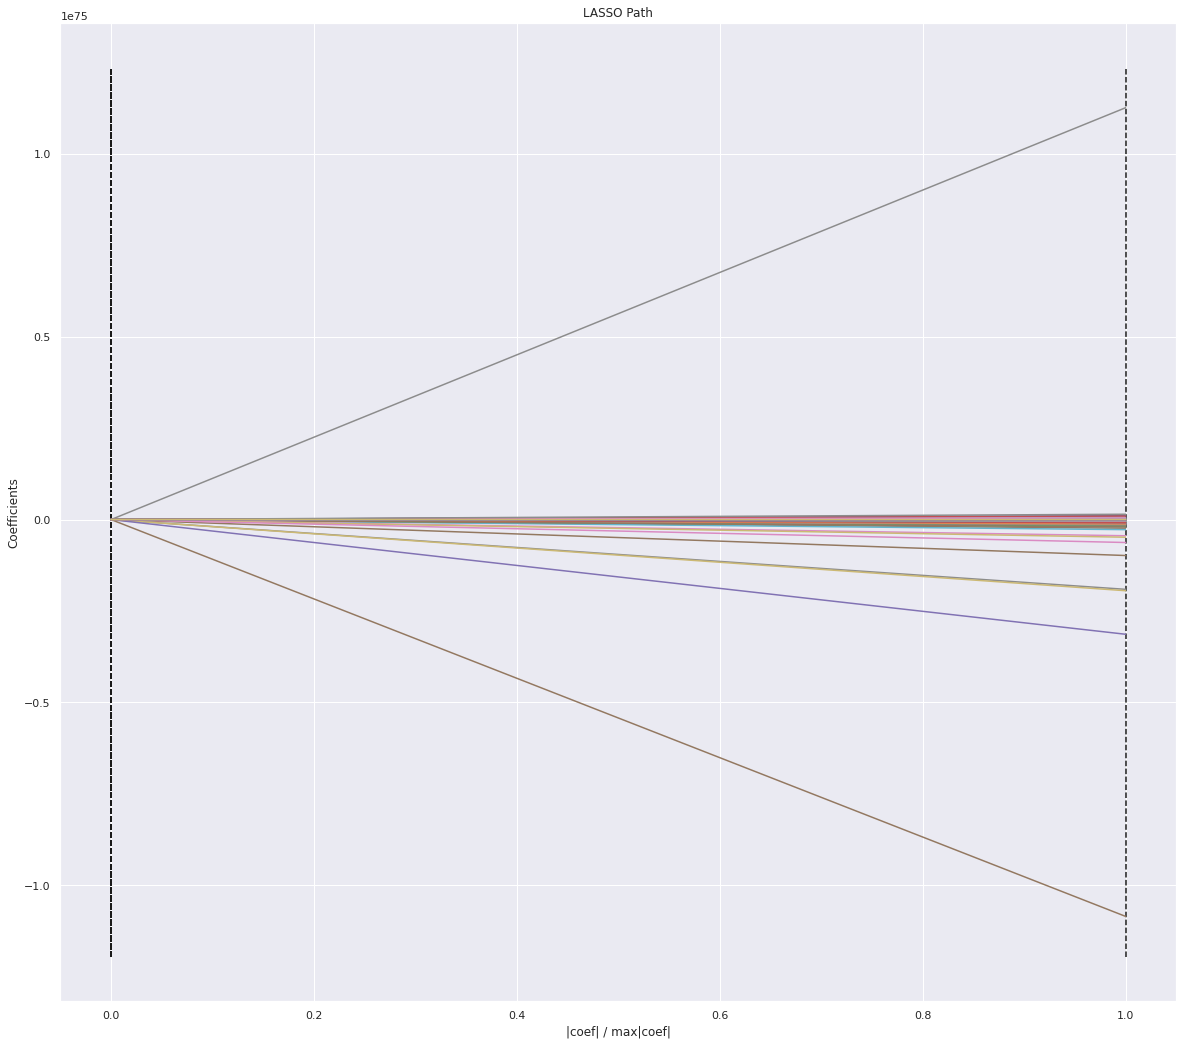

In [ ]:
_, _, coefs = linear_model.lars_path(x_test2, y_test2, method="lar", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")

plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

### Linear Regression

In [ ]:
model_linr.fit(x_train2, y_train2)

LinearRegression()

In [ ]:
model_linr.intercept_

3402270648.250066

In [ ]:
model_linr.coef_

array([ 8.00432854e-02, -1.24586618e-02,  1.92025225e-02,  8.81522920e-02,
        2.26910066e-02,  2.57211061e-02,  4.42908383e-02, -1.13813480e-04,
        1.93288267e-03,  3.76945656e-03, -6.17665364e-03, -2.42172029e-03,
        9.63891354e-04,  2.10348436e-02,  9.05410421e-03,  1.58637901e-02,
        1.02039630e-03,  4.18069351e+10,  1.46718158e+10,  7.32461399e+09,
        4.27906120e+10, -1.42184116e+09, -1.27255676e+09, -1.08514769e+09,
       -2.11824936e+09, -2.25843563e+10, -1.44235460e+10, -1.03729617e+10,
       -3.07180363e+09, -2.63706429e+10, -1.17158959e+10, -4.03935142e+09,
       -1.13700262e+10, -2.13307380e+10, -1.49785027e+10, -3.31588267e+10,
       -2.00520354e+10, -2.75859111e+10, -2.47074692e+10, -1.71641061e+10,
       -1.17158959e+10, -1.96688707e+10, -3.94314380e+10, -8.54816387e+09,
       -2.38022240e+10, -1.80426782e+10, -2.44103682e+10, -2.91837366e+10,
       -1.41681724e+10, -2.39560578e+10, -2.15061639e+10, -2.57134571e+10,
       -1.41681724e+10, -

In [ ]:
modeling_data = pd.DataFrame(x)
regre_dict_1 = {re:g for g,re in zip(modeling_data.columns,model_linr.coef_)}
abs_coef = abs(model_linr.coef_)
regre_dict_2 = {re_2:g_2 for g_2,re_2 in zip(modeling_data.columns,abs_coef)}
print(regre_dict_1)
print(regre_dict_2)

{0.08004328543514548: 'OverallQual', -0.012458661833835927: 'TotalBsmtSF', 0.019202522548251263: '1stFlrSF', 0.08815229201349135: 'GrLivArea', 0.02269100660008045: 'FullBath', 0.025721106093963202: 'TotRmsAbvGrd', 0.04429083834956035: 'GarageCars', -0.00011381348018268261: 'GarageArea', 0.0019328826713781054: 'AgeSinceConst', 0.0037694565601844796: 'LotArea', -0.006176653643823951: 'MasVnrArea', -0.002421720288329359: 'BsmtFinSF1', 0.0009638913542806132: '2ndFlrSF', 0.021034843585373702: 'HalfBath', 0.009054104205055556: 'Fireplaces', 0.015863790114087267: 'WoodDeckSF', 0.0010203963049350354: 'OpenPorchSF', 41806935120.692635: 'LotShape_IR1', 14671815832.358946: 'LotShape_IR2', 7324613986.204844: 'LotShape_IR3', 42790612027.940506: 'LotShape_Reg', -1421841157.1562767: 'LandContour_Bnk', -1272556759.1371198: 'LandContour_HLS', -1085147685.8200204: 'LandContour_Low', -2118249358.6700013: 'LandContour_Lvl', -22584356255.887287: 'LotConfig_Corner', -14423545967.902285: 'LotConfig_CulDSac',

In [ ]:
w_positive = selection_sort_max(model_linr.coef_)
for i in range(10):
  print(regre_dict_1[w_positive[i]])

SaleCondition_Normal
GarageType_Attchd
SaleCondition_Partial
GarageType_Detchd
SaleCondition_Abnorml
HeatingQC_Po
BsmtFinType1_Unf
BsmtFinType1_GLQ
BsmtFinType1_ALQ
LotShape_Reg


In [ ]:
w_negative = selection_sort_min(model_linr.coef_)
for i in range(10):
  print(regre_dict_1[w_negative[i]])

KitchenQual_TA
KitchenQual_Gd
BldgType_1Fam
HeatingQC_Ex
GarageFinish_Unf
BldgType_TwnhsE
HeatingQC_TA
GarageFinish_RFn
GarageFinish_Fin
HeatingQC_Gd


In [ ]:
w_all = selection_sort_max(abs_coef)
for i in range(10):
  print(regre_dict_2[w_all[i]])

KitchenQual_TA
KitchenQual_Gd
BldgType_1Fam
SaleCondition_Normal
HeatingQC_Ex
GarageFinish_Unf
GarageType_Attchd
BldgType_TwnhsE
HeatingQC_TA
GarageFinish_RFn


In [ ]:
def MSE(forecast, prediction):
 
        mse = np.mean((forecast - prediction)**2)**0.5
        return mse

In [ ]:
model_linr.fit(x_train2, y_train2)
y_pred_linr = model_linr.predict(x_test2)
y_pred_linr_training = model_linr.predict(x_train2)
print(f"Linear Regressor: {model_linr}")
print(f"Training R²: {r2_score(y_train2,y_pred_linr_training)}")
print(f"Training RMSE: {MSE(y_train2,y_pred_linr_training)}")
print("------------------------------------------------------------")
print(f"Testing R²: {r2_score(y_test2,y_pred_linr)}")
print(f"Testing RMSE: {MSE(y_test2,y_pred_linr)}")

Linear Regressor: LinearRegression()
Training R²: 0.9054512391098405
Testing R²: -2.2021822657198194e+23
Training RMSE: 0.12196441250851407
Testing RMSE: 192099414490.2757


In [ ]:
#cross validation
scores = cross_val_score(model_linr, x_train2, y_train2, cv=10)
print(scores)
print(scores.mean())

[ 8.71602210e-01 -2.34024374e+23 -1.19584907e+22 -2.62370919e+21
  8.54802867e-01 -1.17542690e+25  8.78126747e-01 -5.89676700e+24
 -4.83644787e+25 -2.13017568e+23]
-6.647713883168335e+24


In [ ]:
strange_data = []
for i in range(y_pred_linr.shape[0]):
  if abs(y_test2.values[i]-y_pred_linr[i]) > 5:
    print(i,end="\t")
    print(y_pred_linr[i],end="\t")
    print(np.where(y_pred_linr==y_pred_linr[i]))
    strange_data.append(i)


53	114360007012.58917	(array([53]),)
99	1645624460810.8313	(array([99]),)
165	527146444621.44885	(array([165]),)
197	2786588369133.599	(array([197]),)
207	-106404152631.0184	(array([207]),)


In [ ]:
strange_data

[53, 99, 165, 197, 207]

In [ ]:
for k in strange_data:
  print(y_test2.index[k])

948
666
595
325
1379


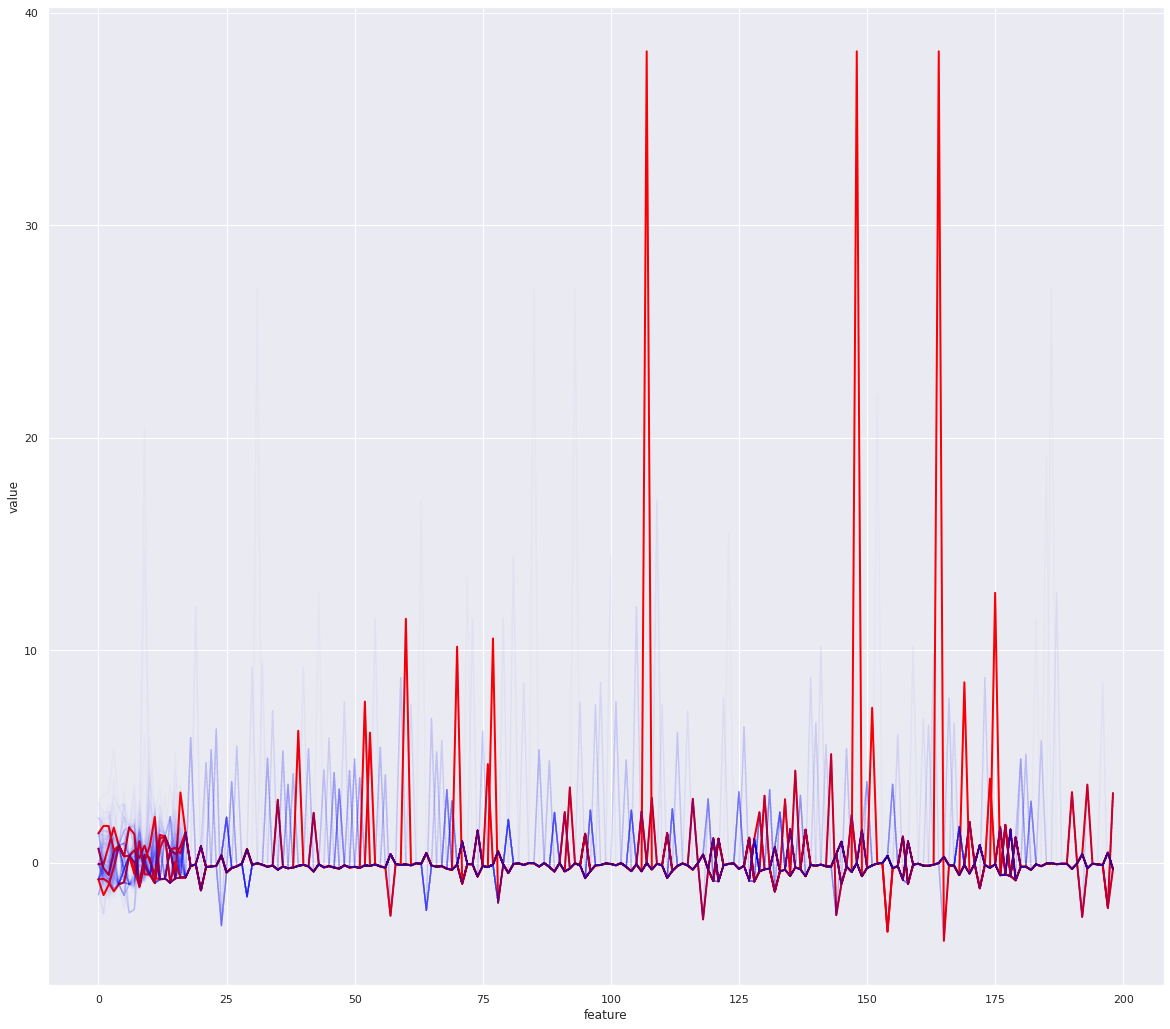

In [ ]:
for i in range(len(x_test2)):
  a=[]
  b=[]
  for j in range(len(x_test2[i])):
      a.append(j)
      b.append(x_test2[i][j])
  for k in range(len(strange_data)):
    if i == strange_data[k]:
      plt.plot(a,b,color='red',linewidth="2")
  
  plt.plot(a,b,color='blue',alpha=0.02)
  
plt.xlabel('feature') 
plt.ylabel('value') 
plt.show()


In [ ]:
strange_feature = []
for k in range(len(strange_data)):
  for l in range(len(x_test2[strange_data[k]])):
    if x_test2[strange_data[k]][l] > 10:
      strange_feature.append(l)
strange_feature = selection_sort_min(strange_feature)
print(f"Strange feature:{strange_feature}\n")

Strange feature:[60, 70, 77, 107, 148, 164, 175]



In [ ]:
features = modeling_data.columns
for i in range(len(features)):
  for k in range(len(strange_feature)):
    if i == strange_feature[k]:
      print(features[i])

Condition1_RRAe
HouseStyle_1.5Unf
RoofStyle_Flat
Exterior2nd_Other
HeatingQC_Po
Functional_Sev
GarageType_CarPort


### PCA

<Figure size 10x10 with 0 Axes>

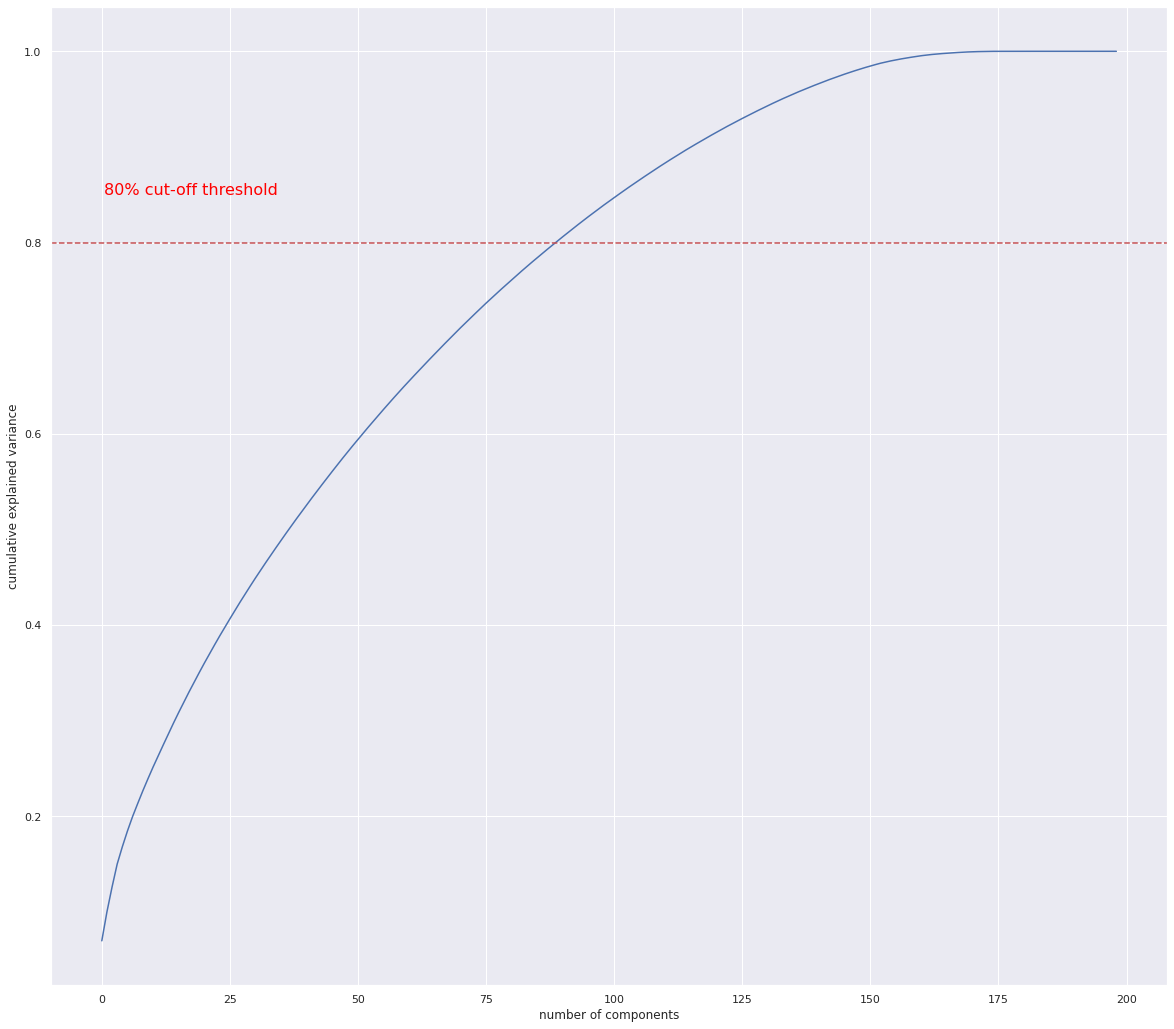

<Figure size 10x10 with 0 Axes>

In [ ]:
pca = PCA()
pca.fit(x_nor)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.8, color='r', linestyle='--')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)
figure(figsize=(2, 2), dpi=5)

In [ ]:
for i in range(len(np.cumsum(pca.explained_variance_ratio_))):
  if np.cumsum(pca.explained_variance_ratio_)[i] >= 0.8:
    a = i
    break
pca = PCA(n_components = a)
pca.fit(x_nor)
x_nor_pca = pca.transform(x_nor)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_nor_pca, y_nor, test_size = 0.2, random_state = 7)
print(f"X_train:{x_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{x_test.shape}\ny_test:{y_test.shape}")

X_train:(1168, 89)
y_train:(1168,)

X_test:(292, 89)
y_test:(292,)


### Linear Regression

In [ ]:
regr_pca = linear_model.LinearRegression()
regr_pca.fit(x_train, y_train)

LinearRegression()

In [ ]:
regr_pca.intercept_

12.025696972210016

In [ ]:
regr_pca.coef_

array([ 0.08972148,  0.01839847,  0.05029047, -0.01057147,  0.00304783,
       -0.01553581, -0.02255123,  0.0021484 ,  0.01407608,  0.00739273,
       -0.0084949 , -0.00578465, -0.00404844, -0.00959101, -0.00256159,
        0.00051679,  0.00965908, -0.00106494, -0.01471161,  0.00915705,
       -0.0055955 , -0.01484367, -0.00959029, -0.01529364, -0.00671115,
        0.01054783,  0.00266575,  0.00807233,  0.00431808, -0.00807306,
       -0.00377249,  0.0121708 , -0.0048762 ,  0.00405574, -0.00334788,
       -0.0032491 ,  0.00084039, -0.00211858,  0.00353389, -0.01140148,
        0.00066508, -0.00025479, -0.01833332,  0.00362942, -0.00172924,
        0.00847182,  0.00066329,  0.00577724, -0.00139311, -0.01037932,
        0.00705944,  0.00701485,  0.00400805,  0.00602094,  0.00124174,
        0.00462134, -0.00505952,  0.00983701,  0.01337939,  0.01377336,
        0.00523867, -0.00920008, -0.00392313,  0.00308091,  0.00282564,
        0.00199566,  0.01204629, -0.01738277,  0.00104534,  0.00

In [ ]:
model_linr.fit(x_train,y_train)
y_pred_linr = model_linr.predict(x_test)
y_pred_adjlinr_training = model_linr.predict(x_train)
print(f"Linear Regressor: {model_linr}")
print(f"Training R²: {r2_score(y_train, y_pred_adjlinr_training)}")
print(f"Training RMSE: {MSE(y_train,y_pred_adjlinr_training)}")
print("------------------------------------------------------------")
print(f"Testing R²: {r2_score(y_test, y_pred_linr)}")
print(f"Testing RMSE: {MSE(y_test, y_pred_linr)}")


Linear Regressor: LinearRegression()
Training R²: 0.8739182209063571
Training RMSE: 0.1408417366699842
------------------------------------------------------------
Testing R²: 0.871772398906978
Testing RMSE: 0.1465852153682112


### Decision Tree Regressor

In [ ]:
model_tree.fit(x_train2, y_train2)
y_pred_tree = model_tree.predict(x_test2)
y_pred_train = model_tree.predict(x_train2)
print(f"Decision Tree Regressor: {model_tree}")
print(f"Training R²: {r2_score(y_train2, y_pred_train)}")
print(f"Training RMSE: {MSE(y_train2,y_pred_train)}")
print("------------------------------------------------------------")
print(f"Testing R²: {r2_score(y_test2, y_pred_tree)}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test2, y_pred_tree))}")

Decision Tree Regressor: DecisionTreeRegressor()
Training R²: 0.9999914400176337
Training RMSE: 0.0011604906411085544
------------------------------------------------------------
Testing R²: 0.7626388021471908
Testing RMSE: 0.1994363297484573


In [ ]:
model_tree.feature_importances_

array([6.12418611e-01, 2.64938036e-02, 3.16569430e-02, 8.31890057e-02,
       1.62645915e-03, 2.36668069e-03, 8.61206634e-02, 1.36496635e-02,
       1.62976243e-02, 1.21247910e-02, 3.82554584e-03, 2.60455661e-02,
       3.56988397e-03, 1.10352426e-03, 9.50928644e-03, 2.54740113e-03,
       2.79438122e-03, 6.53490895e-04, 1.35943974e-04, 0.00000000e+00,
       9.70432808e-05, 4.34336591e-04, 0.00000000e+00, 0.00000000e+00,
       7.41733672e-04, 1.60210393e-04, 7.96180305e-06, 0.00000000e+00,
       0.00000000e+00, 3.85723370e-04, 2.92356318e-04, 0.00000000e+00,
       0.00000000e+00, 1.18304084e-05, 0.00000000e+00, 7.37501875e-05,
       5.51920228e-04, 4.90248526e-07, 4.58902249e-08, 3.99215149e-03,
       8.42415653e-07, 2.57889586e-04, 1.56872945e-04, 0.00000000e+00,
       4.00366226e-04, 1.21485465e-04, 1.18124038e-04, 8.49433554e-05,
       0.00000000e+00, 1.40331262e-05, 1.05146576e-04, 8.22422488e-05,
       0.00000000e+00, 1.50046923e-06, 0.00000000e+00, 1.34539412e-05,
      

In [ ]:
dict_tree = {re:g for g,re in zip(x.columns,model_tree.feature_importances_)}
print(dict_tree)

{0.6124186107780201: 'OverallQual', 0.026493803570238946: 'TotalBsmtSF', 0.03165694303712795: '1stFlrSF', 0.08318900574630894: 'GrLivArea', 0.0016264591534187116: 'FullBath', 0.002366680694800335: 'TotRmsAbvGrd', 0.08612066341718123: 'GarageCars', 0.013649663517417433: 'GarageArea', 0.01629762429904537: 'AgeSinceConst', 0.012124791037093994: 'LotArea', 0.003825545839028308: 'MasVnrArea', 0.026045566140202047: 'BsmtFinSF1', 0.003569883966954964: '2ndFlrSF', 0.0011035242641675104: 'HalfBath', 0.009509286442445253: 'Fireplaces', 0.0025474011297493245: 'WoodDeckSF', 0.0027943812225514424: 'OpenPorchSF', 0.0006534908951734614: 'LotShape_IR1', 0.00013594397390796957: 'LotShape_IR2', 0.0: 'SaleCondition_AdjLand', 9.70432807538975e-05: 'LotShape_Reg', 0.00043433659079935693: 'LandContour_Bnk', 0.0007417336722038018: 'LandContour_Lvl', 0.0001602103933750769: 'LotConfig_Corner', 7.96180304610575e-06: 'LotConfig_CulDSac', 0.0003857233700702006: 'LotConfig_Inside', 0.0002923563179546682: 'Neighbor

In [ ]:
w = selection_sort_max(model_tree.feature_importances_)
for i in range(10):
  print(dict_tree[w[i]])

OverallQual
GarageCars
GrLivArea
1stFlrSF
TotalBsmtSF
BsmtFinSF1
AgeSinceConst
GarageArea
LotArea
Fireplaces


### Random Forest Regressor

In [ ]:
model_ran.fit(x_train2, y_train2)
y_pred_ran = model_ran.predict(x_test2)
y_pred_ran_train = model_ran.predict(x_train2)
print(f"Decision Tree Regressor: {model_ran}")
print(f"Training R²: {r2_score(y_train2, y_pred_ran_train)}")
print(f"Training RMSE: {MSE(y_train2,y_pred_ran_train)}")
print("------------------------------------------------------------")
print(f"Testing R²: {r2_score(y_test2,y_pred_ran )}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test2, y_pred_ran ))}")

Decision Tree Regressor: RandomForestRegressor()
Training R²: 0.9801622838683838
Training RMSE: 0.05586644586300364
------------------------------------------------------------
Testing R²: 0.8889882952200565
Testing RMSE: 0.136390398009031


In [ ]:
model_ran.feature_importances_

array([5.49084950e-01, 4.55280045e-02, 2.74633224e-02, 1.04002968e-01,
       5.57375458e-03, 3.50292805e-03, 6.00403290e-02, 3.32779736e-02,
       1.95233679e-02, 1.60804070e-02, 4.05616592e-03, 2.33770603e-02,
       8.74456734e-03, 1.03231144e-03, 8.56632926e-03, 4.23050168e-03,
       5.09040111e-03, 6.07640878e-04, 7.22565720e-05, 1.17398726e-04,
       1.75084538e-03, 1.13232481e-03, 3.89390981e-04, 1.72401977e-04,
       9.55536639e-04, 3.64246820e-04, 1.87293046e-04, 2.07381325e-04,
       4.12748887e-05, 5.39357427e-04, 7.89566451e-06, 1.37401545e-06,
       3.54674137e-05, 1.87501997e-04, 2.44197091e-04, 2.48944726e-04,
       8.81053097e-04, 8.30876780e-04, 8.04333820e-05, 2.11415556e-03,
       6.09334802e-05, 4.96533939e-05, 7.37062161e-04, 3.39430223e-05,
       2.03647277e-04, 1.64085081e-04, 1.57425439e-04, 1.04464040e-03,
       1.38796961e-04, 3.29688866e-04, 7.20344803e-05, 2.96797008e-04,
       1.27591020e-04, 5.96161825e-05, 1.70107218e-05, 3.06800331e-04,
      

In [ ]:
dict_ran = {re:g for g,re in zip(x.columns,model_ran.feature_importances_)}
print(dict_ran)

{0.5490849499175611: 'OverallQual', 0.04552800447024161: 'TotalBsmtSF', 0.027463322442697256: '1stFlrSF', 0.10400296849010442: 'GrLivArea', 0.0055737545800227: 'FullBath', 0.003502928052078221: 'TotRmsAbvGrd', 0.060040328982950815: 'GarageCars', 0.03327797355250191: 'GarageArea', 0.019523367883532382: 'AgeSinceConst', 0.016080407013672162: 'LotArea', 0.00405616592061762: 'MasVnrArea', 0.023377060282460695: 'BsmtFinSF1', 0.008744567339746073: '2ndFlrSF', 0.0010323114371831945: 'HalfBath', 0.008566329255861002: 'Fireplaces', 0.004230501678610023: 'WoodDeckSF', 0.0050904011076644716: 'OpenPorchSF', 0.0006076408776478603: 'LotShape_IR1', 7.22565719730319e-05: 'LotShape_IR2', 0.00011739872641866848: 'LotShape_IR3', 0.001750845376995083: 'LotShape_Reg', 0.0011323248084365617: 'LandContour_Bnk', 0.00038939098088131783: 'LandContour_HLS', 0.00017240197740789952: 'LandContour_Low', 0.0009555366386888305: 'LandContour_Lvl', 0.00036424682004151335: 'LotConfig_Corner', 0.00018729304637638656: 'Lot

In [ ]:
w = selection_sort_max(model_ran.feature_importances_)
for i in range(10):
  print(dict_ran[w[i]])

OverallQual
GrLivArea
GarageCars
TotalBsmtSF
GarageArea
1stFlrSF
BsmtFinSF1
AgeSinceConst
LotArea
2ndFlrSF


## XGBoost

[05:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

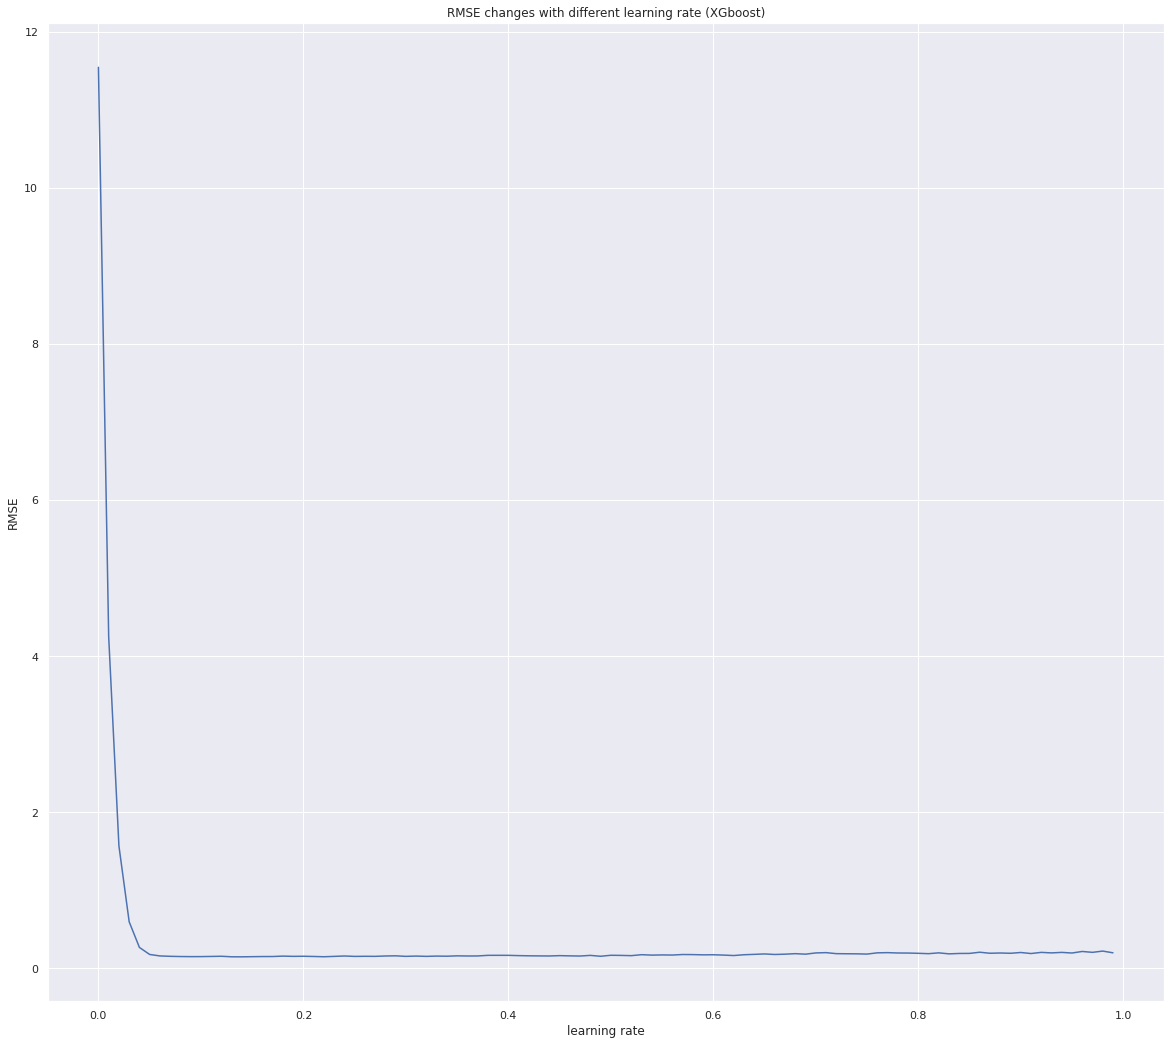

In [ ]:
mse = []
x_axis = []
r2 = []
for i in range(0,100):
    xgbr=xgb.XGBRegressor(learning_rate=i/100)
    xgbr.fit(x_train, y_train)
    mse.append(np.sqrt(mean_squared_error(y_test, xgbr.predict(x_test)))) 
    x_axis.append(i/100)
    r2.append(xgbr.score(x_test,y_test))
plt.xlabel("learning rate")
plt.ylabel("RMSE")
plt.title("RMSE changes with different learning rate (XGboost)")
a = 100
for i in range(len(mse)):
  if mse[i] < a:
    a = mse[i]
    b = i
xgbr_best=xgb.XGBRegressor(learning_rate=b/100)
xgbr_best.fit(x_train2,y_train2)
y_pred_xgbr_best = xgbr_best.predict(x_test2)
print(f"XGB Regressor: {xgbr_best}")
print(f"R²: {r2_score(y_test2, y_pred_xgbr_best)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test2, y_pred_xgbr_best))}\n")
print(np.where(mse == np.min(mse)))
plt.plot(x_axis,mse)

In [ ]:
xgbr_best.feature_importances_

array([0.06503554, 0.0294651 , 0.00426828, 0.04701087, 0.00604687,
       0.00431291, 0.10579079, 0.01206214, 0.02964763, 0.01446631,
       0.00178743, 0.01296704, 0.00317558, 0.01934279, 0.1316563 ,
       0.00399172, 0.00618083, 0.00235483, 0.        , 0.        ,
       0.00232014, 0.00107097, 0.        , 0.        , 0.00094394,
       0.00133729, 0.00233172, 0.        , 0.        , 0.00310284,
       0.        , 0.        , 0.        , 0.00181922, 0.003038  ,
       0.0013396 , 0.00618365, 0.00466461, 0.        , 0.0067149 ,
       0.        , 0.00297343, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00695653, 0.        , 0.00351441,
       0.00143833, 0.00149006, 0.002551  , 0.00121339, 0.00169413,
       0.00809544, 0.        , 0.0045109 , 0.        , 0.        ,
       0.00145051, 0.        , 0.        , 0.        , 0.00542665,
       0.014421  , 0.00169536, 0.        , 0.        , 0.        ,
       0.        , 0.00162991, 0.        , 0.00175595, 0.00232

In [ ]:
dict_xg = {re:g for g,re in zip(x.columns,xgbr_best.feature_importances_)}
print(dict_xg)

{0.06503554: 'OverallQual', 0.029465104: 'TotalBsmtSF', 0.0042682835: '1stFlrSF', 0.047010865: 'GrLivArea', 0.006046874: 'FullBath', 0.004312908: 'TotRmsAbvGrd', 0.10579079: 'GarageCars', 0.012062137: 'GarageArea', 0.029647628: 'AgeSinceConst', 0.014466309: 'LotArea', 0.0017874321: 'MasVnrArea', 0.012967035: 'BsmtFinSF1', 0.0031755797: '2ndFlrSF', 0.019342791: 'HalfBath', 0.1316563: 'Fireplaces', 0.003991715: 'WoodDeckSF', 0.006180833: 'OpenPorchSF', 0.0023548333: 'LotShape_IR1', 0.0: 'SaleCondition_Partial', 0.0023201443: 'LotShape_Reg', 0.0010709721: 'LandContour_Bnk', 0.0009439418: 'LandContour_Lvl', 0.0013372883: 'LotConfig_Corner', 0.002331717: 'LotConfig_CulDSac', 0.0031028374: 'LotConfig_Inside', 0.0018192226: 'Neighborhood_BrkSide', 0.0030380038: 'Neighborhood_ClearCr', 0.0013395965: 'Neighborhood_CollgCr', 0.006183653: 'Neighborhood_Crawfor', 0.0046646097: 'Neighborhood_Edwards', 0.0067149033: 'Neighborhood_IDOTRR', 0.0029734308: 'Neighborhood_Mitchel', 0.006956533: 'Neighborh

In [ ]:
w = selection_sort_max(xgbr_best.feature_importances_)
for i in range(10):
  print(dict_xg[w[i]])

Fireplaces
GarageCars
GarageType_Attchd
OverallQual
BsmtQual_Ex
GrLivArea
HeatingQC_Ex
BsmtFinType1_GLQ
AgeSinceConst
TotalBsmtSF
